In [141]:
import os
os.chdir(r'C:\Users\63094\Downloads\hero wired\datacsv')
os.listdir()
df=pd.read_csv('Dataset (4).csv')
df

<IPython.core.display.Javascript object>

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [142]:
df1=df.rename(columns={'int.rate':'interestrate','log.annual.inc':'annual income','dti':'debts/income','fico':'creditscore','revolbal':'amount unpaid at end','delinq.2yrs':'due','pub.rec':'public_record', 'not.fully.paid':'target','inq.last.6mths':'enquiry'})


In [143]:
df1_encoded=pd.get_dummies(df1,columns=['purpose'],drop_first=True)
df1_encoded

<IPython.core.display.Javascript object>

,credit.policy,interestrate,installment,annual income,debts/income,creditscore,days.with.cr.line,revol.bal,revol.util,enquiry,due,public_record,target,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [144]:
x=df1_encoded.drop('target',axis=1)
y=df1_encoded['target']

In [145]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

<IPython.core.display.Javascript object>

In [146]:
from sklearn import tree
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score,confusion_matrix,cohen_kappa_score,roc_auc_score,roc_curve
 

### general model

In [147]:
model_gen_g=tree.DecisionTreeClassifier( criterion='gini',random_state=42)
model_gen_g.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [148]:
def compare_model_train_test(model_gen_g):
    y_train_pred = model_gen_g.predict(X_train)
    y_test_pred = model_gen_g.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_clf_report = classification_report(y_train, y_train_pred)
    test_clf_report = classification_report(y_test, y_test_pred)
    print('Training accuracy is :', train_accuracy, '\n', train_clf_report, '\n',
         'Testing accuracy is :', round(test_accuracy,2), '\n', test_clf_report, '\n' )

In [149]:
 compare_model_train_test(model_gen_g)

Training accuracy is : 1.0 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5626
           1       1.00      1.00      1.00      1078

    accuracy                           1.00      6704
   macro avg       1.00      1.00      1.00      6704
weighted avg       1.00      1.00      1.00      6704
 
 Testing accuracy is : 0.75 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      2419
           1       0.23      0.26      0.24       455

    accuracy                           0.75      2874
   macro avg       0.54      0.55      0.55      2874
weighted avg       0.76      0.75      0.75      2874
 



In [150]:
def evaluate_preds(y_test, y_test_pred):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}") 

    return metric_dict

### train

In [151]:
y_train_pred = model_gen_g.predict(X_train)
cm=confusion_matrix(y_train,y_train_pred)
cm

array([[5626,    0],
       [   0, 1078]], dtype=int64)

<IPython.core.display.Javascript object>

<AxesSubplot:>

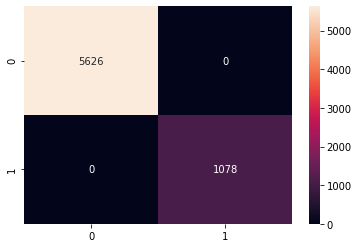

In [152]:
sns.heatmap(cm,annot=True, fmt='g')

### test

In [153]:
y_test_pred = model_gen_g.predict(X_test)
model_gen = evaluate_preds(y_test, y_test_pred)

Acc: 74.67%
Precision: 0.23
Recall: 0.26
F1 score: 0.24


In [154]:
cm=confusion_matrix(y_test,y_test_pred)
cm

array([[2028,  391],
       [ 337,  118]], dtype=int64)

<IPython.core.display.Javascript object>

<AxesSubplot:>

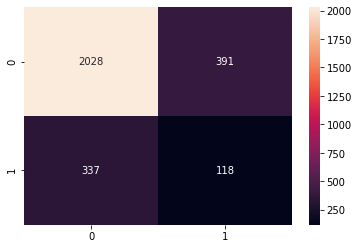

In [155]:
sns.heatmap(cm,annot=True, fmt='g')

In [156]:
y_pred_rcv=model_gen_g.predict_proba(X_test)
y_pred_rcv_pos=y_pred_rcv[:,1]##taking positive probabilities
y_pred_rcv_pos
fpr,tpr,thresholds =roc_curve(y_test,y_pred_rcv_pos)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

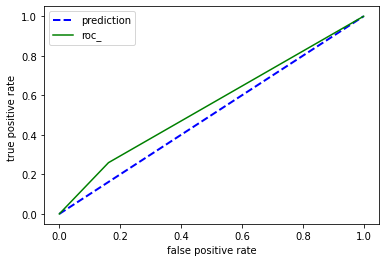

In [157]:
fpr,tpr,thresholds =roc_curve(y_test,y_pred_rcv_pos)
plt.plot([0,1],[0,1],color='blue',label='prediction',linewidth=2,linestyle='--')
plt.xlabel('false positive rate')
plt.plot(fpr,tpr ,color='green',label='roc_')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate ')
plt.legend()
plt.show()

### over sampling or under sampling

### smote

In [158]:
from imblearn.over_sampling import SMOTE
os=SMOTE(sampling_strategy='minority')

In [159]:
x.shape

(9578, 18)

In [160]:
y.shape

(9578,)

In [161]:
x_sm,y_sm=os.fit_resample(x,y)

In [162]:
x_sm.shape

(16090, 18)

In [163]:
y_sm.value_counts()

0    8045
1    8045
Name: target, dtype: int64

In [164]:
X_train_sm,X_test_sm,y_train_sm,y_test_sm=train_test_split(x_sm,y_sm,test_size=0.3,random_state=42)

<IPython.core.display.Javascript object>

In [165]:
y_test_sm.value_counts()

0    2444
1    2383
Name: target, dtype: int64

In [166]:
y_train_sm.value_counts()

1    5662
0    5601
Name: target, dtype: int64

### now these are to be balanced

In [167]:
model_s=tree.DecisionTreeClassifier(criterion='gini',random_state=42)

In [168]:
model_s.fit(X_train_sm,y_train_sm)

DecisionTreeClassifier(random_state=42)

In [169]:
def compare_model_train_test(model_s):
    y_train_pred = model_s.predict(X_train_sm)
    y_test_pred = model_s.predict(X_test_sm)
    train_accuracy = accuracy_score(y_train_sm, y_train_pred)
    test_accuracy = accuracy_score(y_test_sm, y_test_pred)
    train_clf_report = classification_report(y_train_sm, y_train_pred)
    test_clf_report = classification_report(y_test_sm, y_test_pred)
    print('Training accuracy is :', train_accuracy, '\n', train_clf_report, '\n',
         'Testing accuracy is :', round(test_accuracy,2), '\n', test_clf_report, '\n' )

In [170]:
compare_model_train_test(model_s)

Training accuracy is : 1.0 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5601
           1       1.00      1.00      1.00      5662

    accuracy                           1.00     11263
   macro avg       1.00      1.00      1.00     11263
weighted avg       1.00      1.00      1.00     11263
 
 Testing accuracy is : 0.77 
               precision    recall  f1-score   support

           0       0.79      0.73      0.76      2444
           1       0.74      0.81      0.77      2383

    accuracy                           0.77      4827
   macro avg       0.77      0.77      0.76      4827
weighted avg       0.77      0.77      0.76      4827
 



### train

In [171]:
y_pred_s_train=model_s.predict(X_train_sm)
model_sm = evaluate_preds(y_train_sm, y_pred_s_train)

Acc: 100.00%
Precision: 1.00
Recall: 1.00
F1 score: 1.00


In [172]:
cm_train_sm=confusion_matrix(y_pred_s_train,y_pred_s_train)
cm_train_sm

array([[5601,    0],
       [   0, 5662]], dtype=int64)

<IPython.core.display.Javascript object>

<AxesSubplot:>

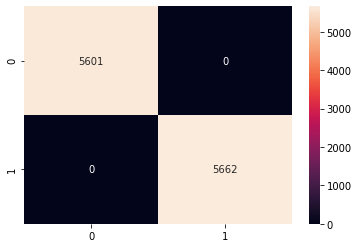

In [173]:
sns.heatmap(cm_train_sm,annot=True, fmt='g')

### test

In [174]:
y_pred_s=model_s.predict(X_test_sm)
model_sm = evaluate_preds(y_test_sm, y_pred_s)

Acc: 76.51%
Precision: 0.74
Recall: 0.81
F1 score: 0.77


In [175]:
cm_test_sm=confusion_matrix(y_test_sm,y_pred_s)
cm_test_sm

array([[1773,  671],
       [ 463, 1920]], dtype=int64)

<IPython.core.display.Javascript object>

<AxesSubplot:>

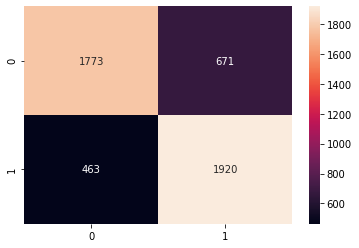

In [176]:
sns.heatmap(cm_test_sm,annot=True, fmt='g')

In [177]:
def evaluate_preds(y_test, y_test_pred):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}") 

    return metric_dict

In [178]:
y_pred_rcv=model_s.predict_proba(X_test_sm)
y_pred_rcv_pos=y_pred_rcv[:,1]##taking positive probabilities
y_pred_rcv_pos
fpr,tpr,thresholds =roc_curve(y_test_sm,y_pred_rcv_pos)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

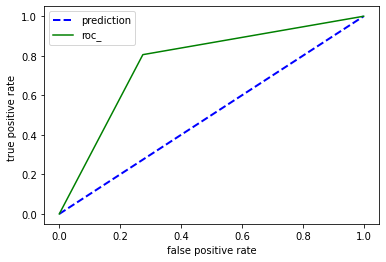

In [179]:
fpr,tpr,thresholds =roc_curve(y_test_sm,y_pred_rcv_pos)
plt.plot([0,1],[0,1],color='blue',label='prediction',linewidth=2,linestyle='--')
plt.xlabel('false positive rate')
plt.plot(fpr,tpr ,color='green',label='roc_')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate ')
plt.legend()
plt.show()

In [180]:
roc_auc_score(y_test_sm,y_pred_s)

0.7655785868670127

### over sampling using the random oversampler

In [181]:
from imblearn import over_sampling,under_sampling
from imblearn.over_sampling import RandomOverSampler

In [182]:
ros=RandomOverSampler( sampling_strategy='minority')
x_ros,y_ros=ros.fit_resample(x,y)

In [183]:
X_train_ros,X_test_ros,y_train_ros,y_test_ros=train_test_split(x_ros,y_ros,test_size=0.3,random_state=42)

<IPython.core.display.Javascript object>

In [184]:
y_test_ros.value_counts()

0    2444
1    2383
Name: target, dtype: int64

In [185]:
y_train_ros.value_counts()

1    5662
0    5601
Name: target, dtype: int64

In [186]:
model_ros_s=tree.DecisionTreeClassifier(criterion='gini',random_state=42)

In [187]:
model_ros_s.fit(X_train_ros,y_train_ros)

DecisionTreeClassifier(random_state=42)

In [188]:
def compare_model_train_test(model_ros):
    y_train_pred = model_ros_s.predict(X_train_ros)
    y_test_pred = model_ros_s.predict(X_test_ros)
    train_accuracy = accuracy_score(y_train_ros, y_train_pred)
    test_accuracy = accuracy_score(y_test_ros, y_test_pred)
    train_clf_report = classification_report(y_train_ros, y_train_pred)
    test_clf_report = classification_report(y_test_ros, y_test_pred)
    print('Training accuracy is :', train_accuracy, '\n', train_clf_report, '\n',
         'Testing accuracy is :', round(test_accuracy,2), '\n', test_clf_report, '\n' )

In [189]:
compare_model_train_test(model_ros_s)

Training accuracy is : 1.0 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5601
           1       1.00      1.00      1.00      5662

    accuracy                           1.00     11263
   macro avg       1.00      1.00      1.00     11263
weighted avg       1.00      1.00      1.00     11263
 
 Testing accuracy is : 0.89 
               precision    recall  f1-score   support

           0       0.97      0.80      0.88      2444
           1       0.83      0.98      0.90      2383

    accuracy                           0.89      4827
   macro avg       0.90      0.89      0.89      4827
weighted avg       0.90      0.89      0.89      4827
 



### train

In [190]:
y_pred_s_train_ros=model_ros_s.predict(X_train_ros)
cm_train_ros=confusion_matrix(y_pred_s_train_ros,y_pred_s_train_ros)
cm_train_ros

array([[5601,    0],
       [   0, 5662]], dtype=int64)

<IPython.core.display.Javascript object>

<AxesSubplot:>

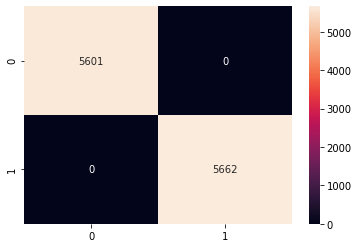

In [191]:
 sns.heatmap(cm_train_ros,annot=True, fmt='g')

### test

In [192]:
y_pred_s_test_ros=model_ros_s.predict(X_test_ros)
cm_test_ros=confusion_matrix(y_test_ros,y_pred_s_test_ros)
cm_test_ros

array([[1963,  481],
       [  53, 2330]], dtype=int64)

<IPython.core.display.Javascript object>

<AxesSubplot:>

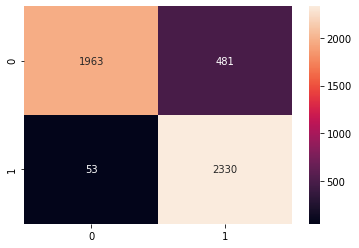

In [193]:
sns.heatmap(cm_test_ros,annot=True, fmt='g')

In [194]:
y_pred_ros=model_ros_s.predict(X_test_ros)

In [195]:
def evaluate_preds(y_test, y_test_pred):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}") 

    return metric_dict

In [196]:

model_ros = evaluate_preds(y_test_ros, y_pred_ros)

Acc: 88.94%
Precision: 0.83
Recall: 0.98
F1 score: 0.90


In [197]:
y_pred_rcv=model_ros_s.predict_proba(X_test_ros)
y_pred_rcv_pos=y_pred_rcv[:,1]##taking positive probabilities
y_pred_rcv_pos
fpr,tpr,thresholds =roc_curve(y_test_ros,y_pred_rcv_pos)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

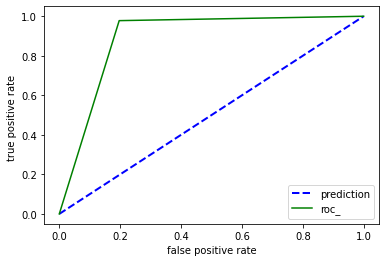

In [198]:
fpr,tpr,thresholds =roc_curve(y_test_ros,y_pred_rcv_pos)
plt.plot([0,1],[0,1],color='blue',label='prediction',linewidth=2,linestyle='--')
plt.xlabel('false positive rate')
plt.plot(fpr,tpr ,color='green',label='roc_')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate ')
plt.legend()
plt.show()

In [199]:
roc_auc_score(y_test_ros,y_pred_rcv_pos)

0.8904753082561763

### post-PRUNING(on oversampling data)............

In [200]:
model=tree.DecisionTreeClassifier(ccp_alpha=0.0,random_state=42)
###its defualt is o for giving better alpha our model should be increased
###firstly we take best alpha value
path=model.cost_complexity_pruning_path(X_train_ros,y_train_ros)
path
ccp_alphas=path.ccp_alphas
print(len(ccp_alphas))
ccp_alphas;

741


In [201]:
l=[]
for k in ccp_alphas:
    model_p=tree.DecisionTreeClassifier(ccp_alpha=k,random_state=42)
    model_p.fit(X_train_ros,y_train_ros)
    l.append(model_p)### we are taking alpha for every in decision tree

In [202]:
test_scores=[model_p.score(X_test_ros,y_test_ros) for model_p in l]
test_scores;

In [203]:
train_scores=[model_p.score(X_train_ros,y_train_ros) for model_p in l]
train_scores;

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

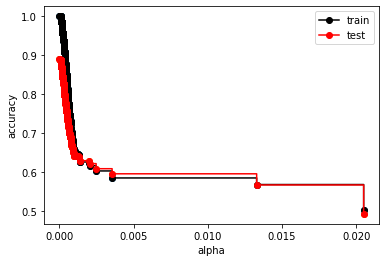

In [204]:
plt.scatter(ccp_alphas,train_scores)
plt.scatter(ccp_alphas,test_scores)
plt.plot(ccp_alphas,train_scores,color='black',marker='o',label='train',drawstyle='steps-post')
plt.plot(ccp_alphas,test_scores,color='red',marker='o',label='test',drawstyle='steps-post')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()
plt.subplots
plt.show()

In [205]:
after_p=tree.DecisionTreeClassifier(ccp_alpha=0.0001)
after_p.fit(X_train_ros,y_train_ros)

DecisionTreeClassifier(ccp_alpha=0.0001)

In [206]:
def compare_model_train_test(model):
    y_train_pred = after_p.predict(X_train_ros)
    y_test_pred = after_p.predict(X_test_ros)
    train_accuracy = accuracy_score(y_train_ros, y_train_pred)
    test_accuracy = accuracy_score(y_test_ros, y_test_pred)
    train_clf_report = classification_report(y_train_ros, y_train_pred)
    test_clf_report = classification_report(y_test_ros, y_test_pred)
    print('Training accuracy is :', train_accuracy, '\n', train_clf_report, '\n',
         'Testing accuracy is :', round(test_accuracy,2), '\n', test_clf_report, '\n' )

In [207]:
compare_model_train_test(model)

Training accuracy is : 0.9932522418538577 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5601
           1       0.99      0.99      0.99      5662

    accuracy                           0.99     11263
   macro avg       0.99      0.99      0.99     11263
weighted avg       0.99      0.99      0.99     11263
 
 Testing accuracy is : 0.88 
               precision    recall  f1-score   support

           0       0.95      0.81      0.87      2444
           1       0.83      0.95      0.89      2383

    accuracy                           0.88      4827
   macro avg       0.89      0.88      0.88      4827
weighted avg       0.89      0.88      0.88      4827
 



In [279]:
from sklearn.model_selection import cross_val_score     ##for logistic regression
score=cross_val_score(after_p,X_test_ros,y_test_ros,cv=10)
score

array([0.76811594, 0.75569358, 0.78467909, 0.7494824 , 0.75362319,
       0.72877847, 0.73913043, 0.74896266, 0.76348548, 0.77593361])

### train

In [208]:
y_pred_s_train_ros=after_p.predict(X_train_ros)
cm_train_p=confusion_matrix(y_train_ros,y_pred_s_train_ros)
cm_train_p

array([[5558,   43],
       [  33, 5629]], dtype=int64)

<IPython.core.display.Javascript object>

<AxesSubplot:>

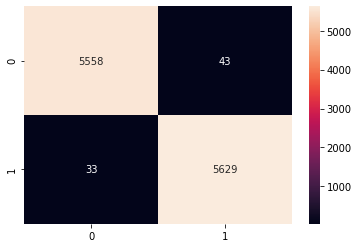

In [209]:
sns.heatmap(cm_train_p,annot=True, fmt='g')

### test

In [223]:
 y_pred_p_test=after_p.predict(X_test_ros)
cm_test_p=confusion_matrix(y_test_ros,y_pred_p)
cm_test_p

array([[1976,  468],
       [ 108, 2275]], dtype=int64)

<IPython.core.display.Javascript object>

<AxesSubplot:>

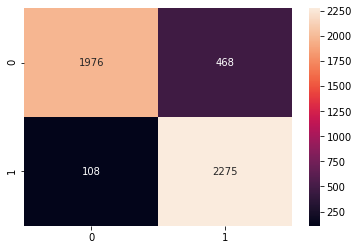

In [224]:
sns.heatmap(cm_test_p,annot=True, fmt='g')

In [225]:
y_pred_p=after_p.predict(X_test_ros)
def evaluate_preds(y_test_ros, y_test_pred):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_test_ros, y_pred_p)
    precision = precision_score(y_test, y_pred_p)
    recall = recall_score(y_test, y_pred_p)
    f1 = f1_score(y_test, y_test_pred)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}") 

    return metric_dict
 

In [226]:
y_pred_p=after_p.predict(X_test_ros)

In [228]:
model_p = evaluate_preds(y_test_ros, y_pred_p)

ValueError: Found input variables with inconsistent numbers of samples: [2874, 4827]

In [229]:
y_pred_rcv=after_p.predict_proba(X_test_ros)
y_pred_rcv_pos=y_pred_rcv[:,1]##taking positive probabilities
y_pred_rcv_pos
fpr,tpr,thresholds =roc_curve(y_test_ros,y_pred_rcv_pos)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

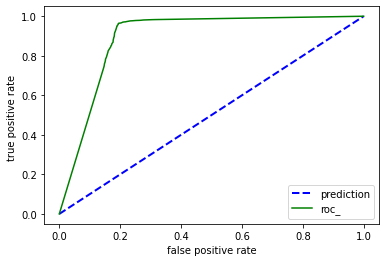

In [230]:

plt.plot([0,1],[0,1],color='blue',label='prediction',linewidth=2,linestyle='--')
plt.xlabel('false positive rate')
plt.plot(fpr,tpr ,color='green',label='roc_')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate ')
plt.legend()
plt.show()

In [231]:
roc_auc_score(y_test_ros,y_pred_p)

0.8815948071892216

### post-pruning(on normal data)

In [232]:
model=tree.DecisionTreeClassifier(ccp_alpha=0.0,random_state=42)
###its defualt is o for giving better alpha our model should be increased
###firstly we take best alpha value
path=model.cost_complexity_pruning_path(X_train,y_train)
path
ccp_alphas=path.ccp_alphas
print(len(ccp_alphas))
ccp_alphas;

404


In [233]:
l=[]
for k in ccp_alphas:
    model_p=tree.DecisionTreeClassifier(ccp_alpha=k,random_state=42)
    model_p.fit(X_train,y_train)
    l.append(model_p)### we are taking alpha for every in decision tree

In [234]:
test_scores=[model_p.score(X_test,y_test) for model_p in l]
test_scores;

In [235]:
train_scores=[model_p.score(X_train,y_train) for model_p in l]
train_scores;

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

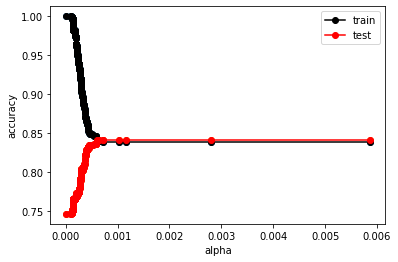

In [236]:
plt.scatter(ccp_alphas,train_scores)
plt.scatter(ccp_alphas,test_scores)
plt.plot(ccp_alphas,train_scores,color='black',marker='o',label='train',drawstyle='steps-post')
plt.plot(ccp_alphas,test_scores,color='red',marker='o',label='test',drawstyle='steps-post')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()
plt.subplots
plt.show()

In [237]:
after_p_n=tree.DecisionTreeClassifier(ccp_alpha=0.0002)
after_p_n.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0002)

In [238]:
def compare_model_train_test(model):
    y_train_pred = after_p_n.predict(X_train)
    y_test_pred = after_p_n.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_clf_report = classification_report(y_train, y_train_pred)
    test_clf_report = classification_report(y_test, y_test_pred)
    print('Training accuracy is :', train_accuracy, '\n', train_clf_report, '\n',
         'Testing accuracy is :', round(test_accuracy,2), '\n', test_clf_report, '\n' )

In [239]:
compare_model_train_test(model)

Training accuracy is : 0.9659904534606205 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      5626
           1       0.96      0.82      0.89      1078

    accuracy                           0.97      6704
   macro avg       0.96      0.91      0.93      6704
weighted avg       0.97      0.97      0.96      6704
 
 Testing accuracy is : 0.76 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      2419
           1       0.25      0.24      0.25       455

    accuracy                           0.76      2874
   macro avg       0.55      0.55      0.55      2874
weighted avg       0.76      0.76      0.76      2874
 



In [240]:
y_pred_p=after_p_n.predict(X_test)
def evaluate_preds(y_test_ros, y_test_pred):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}") 

    return metric_dict
 

In [241]:
model_p = evaluate_preds(y_test_ros, y_pred_p)

Acc: 76.44%
Precision: 0.25
Recall: 0.24
F1 score: 0.25


In [242]:
a=after_p_n.predict(X_test_ros)

In [243]:
y_pred_rcv=after_p_n.predict_proba(X_test_ros)
y_pred_rcv_pos=y_pred_rcv[:,1]##taking positive probabilities
y_pred_rcv_pos
fpr,tpr,thresholds =roc_curve(y_test_ros,y_pred_rcv_pos)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

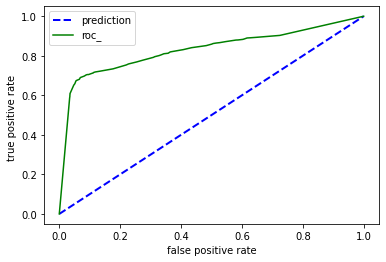

In [244]:
plt.plot([0,1],[0,1],color='blue',label='prediction',linewidth=2,linestyle='--')
plt.xlabel('false positive rate')
plt.plot(fpr,tpr ,color='green',label='roc_')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate ')
plt.legend()
plt.show()

In [245]:
roc_auc_score(y_test_ros,a)

0.8019083620819321

### pruning(on over sampling)

In [249]:
from sklearn.model_selection import GridSearchCV
model_grid=tree.DecisionTreeClassifier(random_state=42 )
grid={'max_depth':range(1,40)}
gs=GridSearchCV(model_grid,grid,cv=5) 

In [250]:
 gs.fit(X_train_ros,y_train_ros)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(1, 40)})

In [252]:
gs.best_params_

{'max_depth': 30}

In [254]:
model_grid_best=tree.DecisionTreeClassifier(ccp_alpha=0.00125,max_depth=30,criterion='gini')
model_grid_best.fit(X_train_ros,y_train_ros)

DecisionTreeClassifier(ccp_alpha=0.00125, max_depth=30)

In [255]:
model_grid_best=tree.DecisionTreeClassifier(ccp_alpha=0.00125,max_depth=30,criterion='gini')
model_grid_best.fit(X_train_ros,y_train_ros)

DecisionTreeClassifier(ccp_alpha=0.00125, max_depth=30)

In [256]:
def compare_model_train_test(model_grid_best):
    y_train_pred = model_grid_best.predict(X_train_ros)
    y_test_pred = model_grid_best.predict(X_test_ros)
    train_accuracy = accuracy_score(y_train_ros, y_train_pred)
    test_accuracy = accuracy_score(y_test_ros, y_test_pred)
    train_clf_report = classification_report(y_train_ros, y_train_pred)
    test_clf_report = classification_report(y_test_ros, y_test_pred)
    print('Training accuracy is :', train_accuracy, '\n', train_clf_report, '\n',
         'Testing accuracy is :', round(test_accuracy,2), '\n', test_clf_report, '\n' )

In [257]:
compare_model_train_test(model_grid_best)

Training accuracy is : 0.6460090562017224 
               precision    recall  f1-score   support

           0       0.69      0.53      0.60      5601
           1       0.62      0.76      0.68      5662

    accuracy                           0.65     11263
   macro avg       0.65      0.65      0.64     11263
weighted avg       0.65      0.65      0.64     11263
 
 Testing accuracy is : 0.64 
               precision    recall  f1-score   support

           0       0.69      0.53      0.60      2444
           1       0.61      0.76      0.68      2383

    accuracy                           0.64      4827
   macro avg       0.65      0.64      0.64      4827
weighted avg       0.65      0.64      0.64      4827
 



[Text(0.56, 0.95, 'interestrate <= 0.093\ngini = 0.5\nsamples = 11263\nvalue = [5601, 5662]'),
 Text(0.36, 0.85, 'creditscore <= 749.5\ngini = 0.359\nsamples = 1406\nvalue = [1076, 330]'),
 Text(0.2, 0.75, 'revol.util <= 75.7\ngini = 0.448\nsamples = 587\nvalue = [388, 199]'),
 Text(0.12, 0.65, 'gini = 0.431\nsamples = 558\nvalue = [383, 175]'),
 Text(0.28, 0.65, 'gini = 0.285\nsamples = 29\nvalue = [5, 24]'),
 Text(0.52, 0.75, 'installment <= 558.205\ngini = 0.269\nsamples = 819\nvalue = [688, 131]'),
 Text(0.44, 0.65, 'gini = 0.236\nsamples = 789\nvalue = [681, 108]'),
 Text(0.6, 0.65, 'gini = 0.358\nsamples = 30\nvalue = [7, 23]'),
 Text(0.76, 0.85, 'credit.policy <= 0.5\ngini = 0.497\nsamples = 9857\nvalue = [4525, 5332]'),
 Text(0.68, 0.75, 'gini = 0.435\nsamples = 2759\nvalue = [881, 1878]'),
 Text(0.84, 0.75, 'purpose_major_purchase <= 0.5\ngini = 0.5\nsamples = 7098\nvalue = [3644, 3454]'),
 Text(0.76, 0.65, 'enquiry <= 2.5\ngini = 0.498\nsamples = 6432\nvalue = [3412, 3020]'),

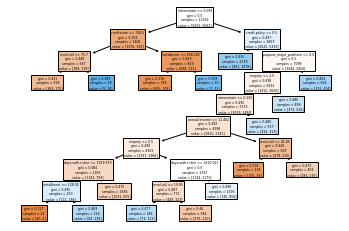

In [258]:
tree.plot_tree(model_grid_best,filled=True,feature_names=df1_encoded.columns)

In [259]:
y_pred_train_p=model_grid_best.predict(X_train_ros)
cm_train_grid=confusion_matrix(y_train_ros,y_pred_train_p)
cm_train_grid

array([[2979, 2622],
       [1365, 4297]], dtype=int64)

<IPython.core.display.Javascript object>

<AxesSubplot:>

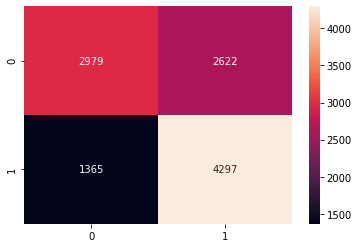

In [260]:
sns.heatmap(cm_train_grid,annot=True, fmt='g')

In [261]:
y_pred_test_p=model_grid_best.predict(X_test_ros)
cm_train_grid_test=confusion_matrix(y_test_ros,y_pred_test_p)
cm_train_grid_test

array([[1297, 1147],
       [ 583, 1800]], dtype=int64)

<IPython.core.display.Javascript object>

<AxesSubplot:>

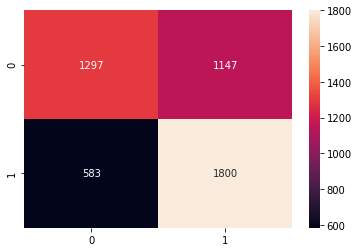

In [262]:
sns.heatmap(cm_train_grid_test,annot=True, fmt='g')

In [263]:
y_pred_rcv=model_grid_best.predict_proba(X_test_ros)
y_pred_rcv_pos=y_pred_rcv[:,1]##taking positive probabilities
y_pred_rcv_pos
fpr,tpr,thresholds =roc_curve(y_test_ros,y_pred_rcv_pos)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

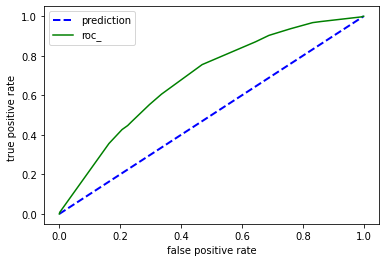

In [264]:
plt.plot([0,1],[0,1],color='blue',label='prediction',linewidth=2,linestyle='--')
plt.xlabel('false positive rate')
plt.plot(fpr,tpr ,color='green',label='roc_')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate ')
plt.legend()
plt.show()

In [265]:
roc_auc_score(y_test_ros,y_pred_test_p)

0.6430188981829146

### pruning on normal data

In [269]:
from sklearn.model_selection import GridSearchCV
model_grid=tree.DecisionTreeClassifier(random_state=42)
grid={'max_depth':range(1,40)}
gs=GridSearchCV(model_grid,grid,cv=5) 

In [270]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(1, 40)})

In [272]:
gs.best_params_

{'max_depth': 1}

In [273]:
model_grid_best=tree.DecisionTreeClassifier(ccp_alpha=0.00125,max_depth=1, min_samples_leaf=2,min_samples_split=4,criterion='gini')
model_grid_best.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.00125, max_depth=1, min_samples_leaf=2,
                       min_samples_split=4)

In [274]:
model_grid_best_n=tree.DecisionTreeClassifier(ccp_alpha=0.00125,max_depth=1, min_samples_leaf=2,min_samples_split=4,criterion='gini')
model_grid_best_n.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.00125, max_depth=1, min_samples_leaf=2,
                       min_samples_split=4)

In [275]:
def compare_model_train_test(model_grid_best_n):
    y_train_pred = model_grid_best_n.predict(X_train)
    y_test_pred = model_grid_best_n.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_clf_report = classification_report(y_train, y_train_pred)
    test_clf_report = classification_report(y_test, y_test_pred)
    print('Training accuracy is :', train_accuracy, '\n', train_clf_report, '\n',
         'Testing accuracy is :', round(test_accuracy,2), '\n', test_clf_report, '\n' )

In [276]:
compare_model_train_test(model_grid_best_n)

Training accuracy is : 0.839200477326969 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      5626
           1       0.00      0.00      0.00      1078

    accuracy                           0.84      6704
   macro avg       0.42      0.50      0.46      6704
weighted avg       0.70      0.84      0.77      6704
 
 Testing accuracy is : 0.84 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2419
           1       0.00      0.00      0.00       455

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.71      0.84      0.77      2874
 



C:\Users\63094\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\63094\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\63094\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\63094\anaconda3\lib\site-packages\sklearn\metr

In [ ]:

compare_metrics = pd.DataFrame({"base_model": model_gen,
                                "smote": model_sm,
                                "randomover": model_ros,
                               "post-pruning(oversamp)":after_p,
                               "post=pruning(normal)" :after_p_n,})

In [ ]:
compare_metrics.plot.bar(figsize=(10, 8));

In [ ]:
from sklearn.model_selection import cross_val_score     ##for logistic regression
score=cross_val_score(logreg,x,y,cv=10)